Heart Disease Risk Classification Using Logistic Regression

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Administrator\Desktop\Jupyter notebook\heart (2).csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
# rows,columns
df.shape

(918, 12)

In [3]:
# Data types + Memory
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [4]:
# Statistical History / numeric summary
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
# Missing values
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# Duplicate Rows
df.duplicated().sum()

np.int64(0)

In [7]:
# Unique Values in Categorical columns  (df[col].unique())
df['Sex'].unique()
df['ChestPainType'].unique()
df['RestingECG'].unique()
df['ExerciseAngina'].unique()
df['ST_Slope'].unique()


array(['Up', 'Flat', 'Down'], dtype=object)

Missing Value Visualization

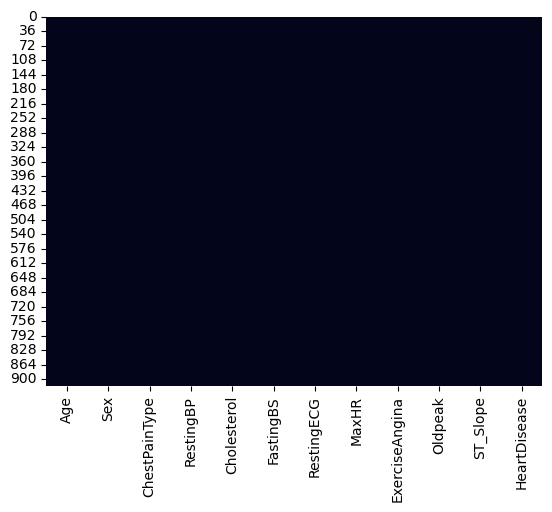

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Checking Outliers (Boxplots)

<Axes: >

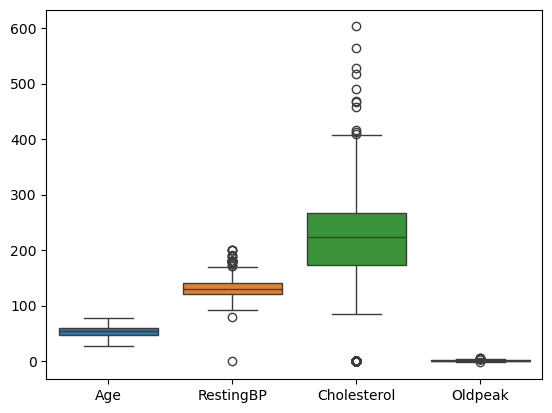

In [11]:
import seaborn as sns
sns.boxplot(data=df[['Age','RestingBP','Cholesterol','Oldpeak']])


Distribution of Numeric Features (Histograms)

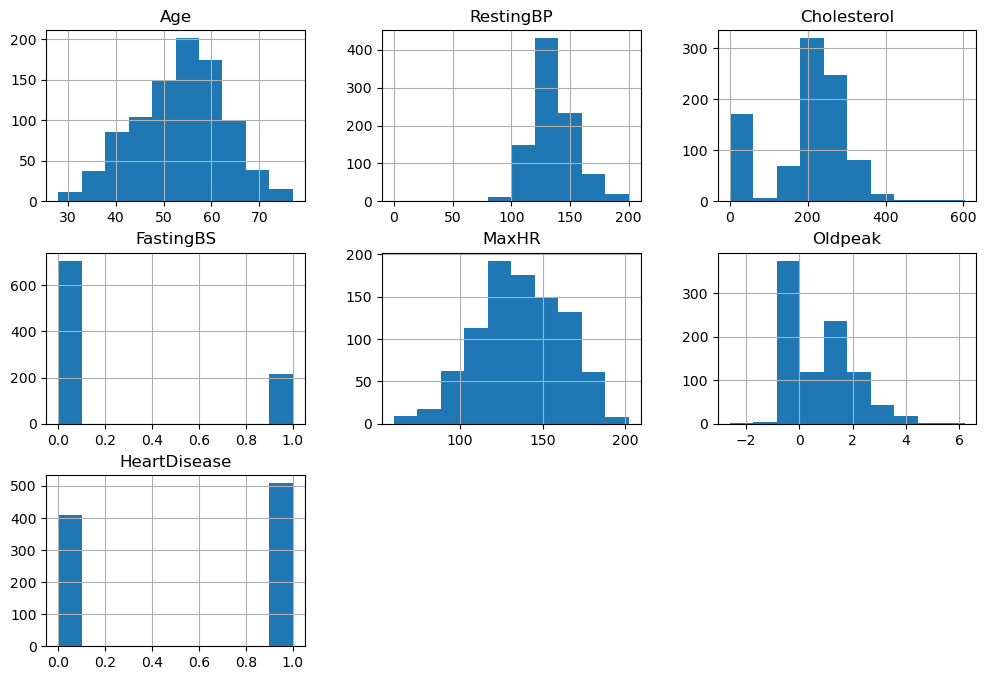

In [12]:
df.hist(figsize=(12,8))
plt.show()


Handling missing values

Numeric → mean/median

Categorical → mode

In [19]:
# Numeric columns
num_cols = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns
cat_cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Encoding categorical columns

Binary → label encode

Multi-category → one-hot encode

In [20]:
# binary encoding
df['Sex'] = df['Sex'].map({'M':1, 'F':0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y':1, 'N':0})


In [21]:
# one hot for multi-category
df = pd.get_dummies(df, columns=['ChestPainType','RestingECG','ST_Slope'], drop_first=True)


Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_scaled = scaler.fit_transform(X)


Train/Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Model Training

In [24]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

Evaluation

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8532608695652174
[[67 10]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

